In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('7.csv')

In [2]:
df

,Unnamed: 0,Operator,Network Type,In Out Travelling,State Name,Call Dropped,Satisfactory,Poor Voice Quality,label
0,0,Airtel,2G,Indoor,Andhra Pradesh,35.714286,46.428571,17.857143,Average
1,1,Airtel,2G,Indoor,Assam,0.000000,66.666667,33.333333,Very Good
2,2,Airtel,2G,Indoor,Bihar,0.000000,53.846154,46.153846,Average
3,3,Airtel,2G,Indoor,Delhi,5.555556,27.777778,66.666667,Poor
4,4,Airtel,2G,Indoor,Gujarat,2.816901,88.732394,8.450704,Excellent
...,...,...,...,...,...,...,...,...,...
987,987,Vodafone,4G,Travelling,Tamil Nadu,1.104972,90.607735,8.287293,Excellent
988,988,Vodafone,4G,Travelling,Telangana,7.894737,81.578947,10.526316,Excellent
989,989,Vodafone,4G,Travelling,Uttar Pradesh,5.084746,47.457627,47.457627,Average
990,990,Vodafone,4G,Travelling,Uttarakhand,40.000000,0.000000,60.000000,Inadequate


In [3]:
df1 = df[df['Operator']=='Airtel']

In [4]:
df1

,Unnamed: 0,Operator,Network Type,In Out Travelling,State Name,Call Dropped,Satisfactory,Poor Voice Quality,label
0,0,Airtel,2G,Indoor,Andhra Pradesh,35.714286,46.428571,17.857143,Average
1,1,Airtel,2G,Indoor,Assam,0.000000,66.666667,33.333333,Very Good
2,2,Airtel,2G,Indoor,Bihar,0.000000,53.846154,46.153846,Average
3,3,Airtel,2G,Indoor,Delhi,5.555556,27.777778,66.666667,Poor
4,4,Airtel,2G,Indoor,Gujarat,2.816901,88.732394,8.450704,Excellent
...,...,...,...,...,...,...,...,...,...
215,215,Airtel,4G,Travelling,Telangana,3.519062,41.202346,55.278592,Average
216,216,Airtel,4G,Travelling,Tripura,0.000000,30.000000,70.000000,Poor
217,217,Airtel,4G,Travelling,Uttar Pradesh,12.324930,61.344538,26.330532,Very Good
218,218,Airtel,4G,Travelling,Uttarakhand,0.487805,95.609756,3.902439,Excellent


C:\Users\Mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


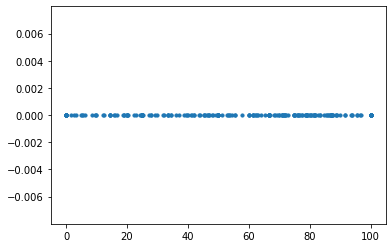

In [59]:
from copy import deepcopy
from matplotlib import pyplot as plt
%matplotlib inline
center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])
df1['unsatisfactory'] = df1['Call Dropped']+df1['Poor Voice Quality'] 

data_1 = np.zeros(220)
data_2 = np.array(list(df1['Satisfactory']))
data_3 = np.column_stack((data_2,data_1))
plt.scatter(data_3[:,0],data_3[:,1], s=10)

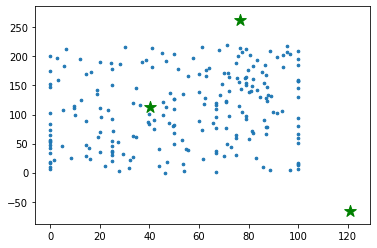

In [56]:
k = 3
# Number of training data
n = data_3.shape[0]
# Number of features in the data
c = data_3.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data_3, axis = 0)
std = np.std(data_3, axis = 0)
centers = np.random.randn(k,c)*std + mean

# Plot the data and the centers generated as random
plt.scatter(data_3[:,0], data_3[:,1], s=7)
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)

In [57]:
centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

data.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centers_new - centers_old)

# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
    # Measure the distance to every center
    for i in range(k):
        distances[:,i] = np.linalg.norm(data_3 - centers[i], axis=1)
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(k):
        centers_new[i] = np.mean(data_3[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
centers_new 


array([[ 48.8541801 ,  99.63333333],
       [ 83.80547387,   7.2       ],
       [ 72.95258641, 202.8       ]])

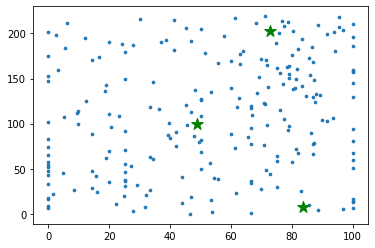

In [58]:
plt.scatter(data_3[:,0], data_3[:,1], s=7)
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)

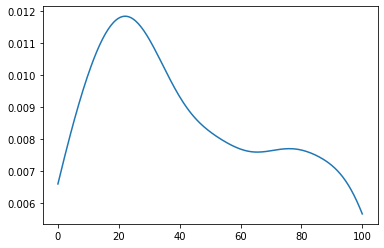

In [65]:
from scipy.stats import kde
import matplotlib.pyplot as plt 
x = np.array(list(df1['unsatisfactory']))
density = kde.gaussian_kde(x) # x: list of price
xgrid = np.linspace(x.min(), x.max(), 220)   
plt.plot(xgrid, density(xgrid))
plt.show()